In [1]:
# Import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

import tensorflow as tf
print(tf.__version__)

import warnings
warnings.filterwarnings("ignore")

2.11.0


# Load data files

In [2]:
data_path = r"C:\Users\Admin\Downloads\task_2\dataset"

In [3]:
categories = os.listdir(data_path)
print(categories)                       # in dataset folder two files

['without_mask', 'with_mask']


In [4]:
label = [i   for i in range   (len(categories))]
print(label)

label_dict = dict(zip(categories,label))
print(label_dict)                            

[0, 1]
{'without_mask': 0, 'with_mask': 1}


# Data Pre-Processing

In [5]:
# Set the desired width and height for the processed images
img_size = 100

data = []
labels = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:     
            # converting the image into gray scale,it has single channel to reduce computational complexity
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            resized = cv2.resize(gray, (img_size, img_size))

            data.append(resized)
            labels.append(label_dict[category])
            # appending the image(data) and label
        else:                   
            print("Failed to read image: ", img_path)

Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_œ¬‘ÿ.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-23 132115.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-23 132400.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-24 171804.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-24 172039.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-24 202509.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-24 205216.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-24 215234.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 2020-02-24 215615.png
Failed to read image:  C:\Users\Admin\Downloads\task_2\dataset\with_mask\0_0_≈˙◊¢ 

In [6]:
print(len(data))             # total no. of images

print(len(labels))

3810
3810


In [7]:
print(data[0])       # image pixel values lies between 0-255

[[ 9  9 10 ... 21 27 27]
 [ 8  8  7 ...  8 13 15]
 [12 10 10 ...  4  4  4]
 ...
 [66 67 58 ...  1  0  0]
 [66 64 53 ...  2  0  0]
 [60 56 49 ...  2  0  0]]


In [8]:
print(data[0].shape)      # this will be input_shape

(100, 100)


In [9]:
# Converting into numpy array and Scaling the raw pixel intensities to the range [0,1]
data = np.array(data)/255.0

data = np.reshape(data,(data.shape[0],img_size,img_size,1))

labels = np.array(labels)   # no scaling here as it is already labelled data i.e [0, 1]

In [10]:
print(data[0])

[[[0.03529412]
  [0.03529412]
  [0.03921569]
  ...
  [0.08235294]
  [0.10588235]
  [0.10588235]]

 [[0.03137255]
  [0.03137255]
  [0.02745098]
  ...
  [0.03137255]
  [0.05098039]
  [0.05882353]]

 [[0.04705882]
  [0.03921569]
  [0.03921569]
  ...
  [0.01568627]
  [0.01568627]
  [0.01568627]]

 ...

 [[0.25882353]
  [0.2627451 ]
  [0.22745098]
  ...
  [0.00392157]
  [0.        ]
  [0.        ]]

 [[0.25882353]
  [0.25098039]
  [0.20784314]
  ...
  [0.00784314]
  [0.        ]
  [0.        ]]

 [[0.23529412]
  [0.21960784]
  [0.19215686]
  ...
  [0.00784314]
  [0.        ]
  [0.        ]]]


In [11]:
print(labels)                       # not in specific vector of own , its merged in one array

[0 0 0 ... 1 1 1]


In [12]:
# Convert the labels from integers/categories to vectors

labels = to_categorical(labels, num_classes=2)  

# [0,1] Represents label 1:WITH_MASK
# [1,0] Represents label 0:WITHOUT_MASK

In [13]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Splitting the Data

In [14]:
# Split the data into train and test

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.1, random_state=42)

In [15]:
print(trainX.shape)         # no.of images,width,height,grayscale_channel so 1
print(trainY.shape)

print(testX.shape)
print(testY.shape)

(3429, 100, 100, 1)
(3429, 2)
(381, 100, 100, 1)
(381, 2)


In [16]:
print(trainX[0])

[[[0.14901961]
  [0.15294118]
  [0.14509804]
  ...
  [0.10196078]
  [0.11764706]
  [0.09019608]]

 [[0.14509804]
  [0.14901961]
  [0.14117647]
  ...
  [0.09019608]
  [0.10588235]
  [0.08235294]]

 [[0.13333333]
  [0.13333333]
  [0.1254902 ]
  ...
  [0.09019608]
  [0.10196078]
  [0.09019608]]

 ...

 [[0.00784314]
  [0.00784314]
  [0.01176471]
  ...
  [0.00392157]
  [0.01568627]
  [0.00392157]]

 [[0.00784314]
  [0.00392157]
  [0.01176471]
  ...
  [0.07058824]
  [0.04705882]
  [0.02352941]]

 [[0.00784314]
  [0.00392157]
  [0.01568627]
  ...
  [0.2       ]
  [0.16078431]
  [0.12941176]]]


In [17]:
print(trainY[0])

[0. 1.]


# CNN

In [18]:
model = Sequential()

# First set of CONV => RELU => MaxPOOL Layers
model.add(Conv2D(64,(3,3), input_shape=data.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second set of CONV => RELU => MaxPOOL Layers
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(128))
model.add(Activation("relu"))

# The Final layer with two outputs for two categories
model.add(Dense(2))
model.add(Activation("softmax"))

In [19]:
# Compile the neural network
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [21]:
checkpoint = ModelCheckpoint("model-{epoch:03d}.model", monitor="val_loss", verbose=0, save_best_only=True, mode="auto")

In [22]:
# Training the neural network
print("[INFO] training network....")
history = model.fit(trainX, trainY, epochs=20, callbacks=[checkpoint], validation_split=0.2)

[INFO] training network....
Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.6145 - accuracy: 0.6850

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


86/86 [==============================] - 44s 486ms/step - loss: 0.6145 - accuracy: 0.6850 - val_loss: 0.4058 - val_accuracy: 0.8309
Epoch 2/20
86/86 [==============================] - 39s 453ms/step - loss: 0.4101 - accuracy: 0.8155 - val_loss: 0.4296 - val_accuracy: 0.8003
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.3467 - accuracy: 0.8494

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


86/86 [==============================] - 40s 471ms/step - loss: 0.3467 - accuracy: 0.8494 - val_loss: 0.2761 - val_accuracy: 0.8819
Epoch 4/20
86/86 [==============================] - ETA: 0s - loss: 0.2550 - accuracy: 0.8917

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


86/86 [==============================] - 41s 475ms/step - loss: 0.2550 - accuracy: 0.8917 - val_loss: 0.2704 - val_accuracy: 0.8834
Epoch 5/20
86/86 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9198

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


86/86 [==============================] - 41s 476ms/step - loss: 0.2014 - accuracy: 0.9198 - val_loss: 0.2605 - val_accuracy: 0.8848
Epoch 6/20
86/86 [==============================] - ETA: 0s - loss: 0.1800 - accuracy: 0.9260

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


86/86 [==============================] - 41s 475ms/step - loss: 0.1800 - accuracy: 0.9260 - val_loss: 0.2204 - val_accuracy: 0.9198
Epoch 7/20
86/86 [==============================] - 40s 460ms/step - loss: 0.1481 - accuracy: 0.9391 - val_loss: 0.2844 - val_accuracy: 0.8805
Epoch 8/20
86/86 [==============================] - ETA: 0s - loss: 0.1258 - accuracy: 0.9544

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


86/86 [==============================] - 40s 470ms/step - loss: 0.1258 - accuracy: 0.9544 - val_loss: 0.2171 - val_accuracy: 0.9009
Epoch 9/20
86/86 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9679

INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


86/86 [==============================] - 41s 475ms/step - loss: 0.0879 - accuracy: 0.9679 - val_loss: 0.1821 - val_accuracy: 0.9198
Epoch 10/20
86/86 [==============================] - 40s 464ms/step - loss: 0.0782 - accuracy: 0.9723 - val_loss: 0.2346 - val_accuracy: 0.9140
Epoch 11/20
86/86 [==============================] - 38s 443ms/step - loss: 0.0721 - accuracy: 0.9759 - val_loss: 0.2023 - val_accuracy: 0.9169
Epoch 12/20
86/86 [==============================] - 38s 446ms/step - loss: 0.0485 - accuracy: 0.9861 - val_loss: 0.2318 - val_accuracy: 0.9242
Epoch 13/20
86/86 [==============================] - 38s 445ms/step - loss: 0.0541 - accuracy: 0.9821 - val_loss: 0.2133 - val_accuracy: 0.9242
Epoch 14/20
86/86 [==============================] - 38s 443ms/step - loss: 0.0528 - accuracy: 0.9840 - val_loss: 0.2094 - val_accuracy: 0.9257
Epoch 15/20
86/86 [==============================] - 38s 445ms/step - loss: 0.0300 - accuracy: 0.9927 - val_loss: 0.2293 - val_accuracy: 0.9271
Epoc

# Model Evaluation

In [23]:
loss, accuracy = model.evaluate(testX, testY)
print("Test Accuracy = ", accuracy)

12/12 [==============================] - 2s 139ms/step - loss: 0.1454 - accuracy: 0.9449
Test Accuracy =  0.9448819160461426


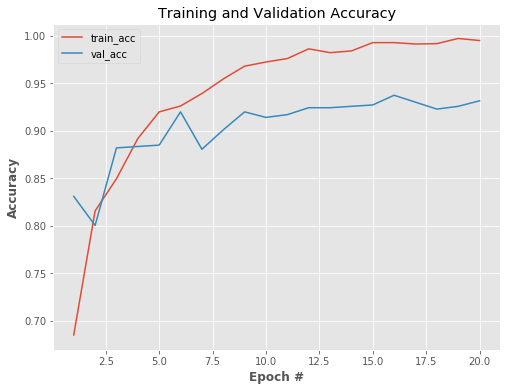

In [24]:
# Plot the training and validation accuracy

N = np.arange(1, 21)   # no.of epochs

plt.style.use("ggplot")

plt.figure(figsize = [8,6])
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")

plt.legend()
plt.show()

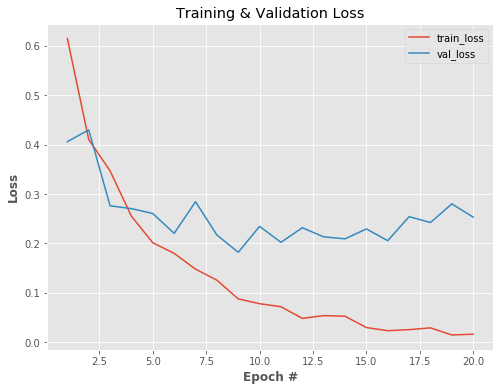

In [25]:
# Plot the training and validation loss

N = np.arange(1, 21)

plt.style.use("ggplot")

plt.figure(figsize = [8,6])
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")

plt.legend()
plt.show()

# Detecting Face Mask

In [26]:
# Labelling the information
labels_dict = {0:"WITHOUT_MASK",1:"WITH_MASK"}

# Setting boundary rectangle color using BGR
color_dict = {0:(0,0,255), 1:(0,255,0)}

In [27]:
# Loading model
model = load_model("model-011.model")      

In [28]:
# For face detection,using haarcascade classifier algorithm
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [29]:
source = cv2.VideoCapture(0)

while True:
    ret, img = source.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    for x, y, w, h in faces:
        # Extract the face region from the grayscale image
        face_img = gray[y:y+w, x:x+w]

        # Resize the face region to a fixed size
        resized = cv2.resize(face_img, (100, 100))

        # Normalize the pixel values to a range between 0 and 1
        normalized = resized / 255.0

        # Reshape the normalized face image to a 4D array for prediction
        reshaped = np.reshape(normalized, (1, 100, 100, 1))

        # Perform face recognition by passing the reshaped image
        result = model.predict(reshaped)

        # Getting the predicted label
        label = np.argmax(result, axis=1)[0]

        # Draw a rectangle around the detected face and display the label on the frame
        cv2.rectangle(img, (x, y), (x+w, y+h), color_dict[label], 2)
        cv2.rectangle(img, (x, y-40), (x+w, y), color_dict[label], -1)
        cv2.putText(img, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)


    cv2.imshow("LIVE", img)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()
source.release()

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 49ms/step
